In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
import seaborn as sns

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression,SGDClassifier,RidgeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score,log_loss,mean_squared_error,roc_auc_score
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder,PowerTransformer
from feature_engine.encoding import WoEEncoder, RareLabelEncoder
import matplotlib.pyplot as plt
from statsmodels.tools.eval_measures import rmse
from matplotlib.colors import ListedColormap
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image  

In [2]:
df1=pd.read_csv('model_data1')
df1.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36 months,11.44,329.48,B,10+ years,RENT,117000.0,Not Verified,0,vacation,26.24,16,0,36369.0,41.8,25,INDIVIDUAL,0,0
1,8000.0,36 months,11.99,265.68,B,4 years,MORTGAGE,65000.0,Not Verified,0,debt_consolidation,22.05,17,0,20131.0,53.3,27,INDIVIDUAL,3,0
2,15600.0,36 months,10.49,506.97,B,< 1 year,RENT,43057.0,Source Verified,0,credit_card,12.79,13,0,11987.0,92.2,26,INDIVIDUAL,0,0
3,7200.0,36 months,6.49,220.65,A,6 years,RENT,54000.0,Not Verified,0,credit_card,2.60,6,0,5472.0,21.5,13,INDIVIDUAL,0,0
4,24375.0,60 months,17.27,609.33,C,9 years,MORTGAGE,55000.0,Verified,1,credit_card,33.95,13,0,24584.0,69.8,43,INDIVIDUAL,1,0


<div align="center">
   <font color="purple" size=6px>
       <b>LOGICTIC REGRESSION CLASSIFICATION 

**Creating Base model**

In [3]:
#separating independent and target variable
df1_features=df1.drop('loan_status',axis=1)
df1_target=df1['loan_status']

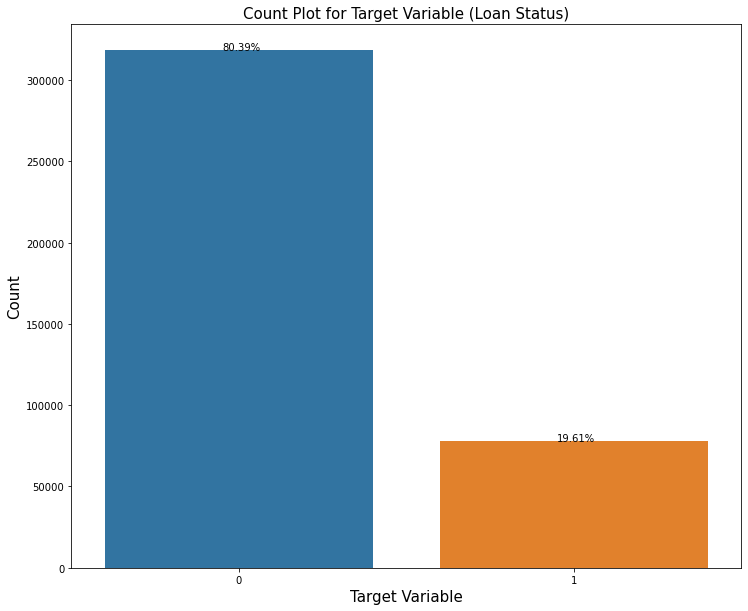

In [4]:
#checking for class imbalance
plt.rcParams['figure.figsize']=[12,10]
sns.countplot(x = df1_target)
plt.text(x = -0.05, y = df1_target.value_counts()[0] + 1, s = str(round((df1_target.value_counts()[0])*100/len(df1_target),2)) + '%')
plt.text(x = 0.95, y = df1_target.value_counts()[1] +1, s = str(round((df1_target.value_counts()[1])*100/len(df1_target),2)) + '%')
plt.title('Count Plot for Target Variable (Loan Status)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

In [5]:
#splitting data into train and test subset
x_train_full, x_test_full,y_train_full,y_test_full=train_test_split(df1_features,df1_target,test_size=0.3,random_state=2)
print('x_train_full',x_train_full.shape)
print('y_train_full',y_train_full.shape)
print('x_test_full',x_test_full.shape)
print('y_test_full',y_test_full.shape)

x_train_full (277220, 19)
y_train_full (277220,)
x_test_full (118809, 19)
y_test_full (118809,)


In [6]:
#encoding categorical variable
le=LabelEncoder()
Oe=OrdinalEncoder()
Oh=OneHotEncoder()
clf=WoEEncoder()
x_train_full['home_ownership']=le.fit_transform(x_train_full['home_ownership'])
x_train_full['purpose']=clf.fit_transform(x_train_full[['purpose']],y_train_full)
x_train_full['grade']=Oe.fit_transform(x_train_full[['grade']])
x_train_full['emp_length']=Oe.fit_transform(x_train_full[['emp_length']])
x_train_full['term']=le.fit_transform(x_train_full['term'])
x_test_full['home_ownership']=le.fit_transform(x_test_full['home_ownership'])
x_test_full['purpose']=clf.fit_transform(x_test_full[['purpose']],y_test_full)
x_test_full['grade']=Oe.fit_transform(x_test_full[['grade']])
x_test_full['emp_length']=Oe.fit_transform(x_test_full[['emp_length']])
x_test_full['term']=le.fit_transform(x_test_full['term'])


In [7]:
x=pd.get_dummies(x_train_full[['verification_status','application_type']],drop_first=True)
y=pd.get_dummies(x_test_full[['verification_status','application_type']],drop_first=True)


In [8]:
x_train_full=pd.concat(objs=[x_train_full,x],axis=1)
x_test_full=pd.concat(objs=[x_test_full,y],axis=1)

In [9]:
x_train_full.drop(['verification_status','application_type'],axis=1,inplace=True)
x_test_full.drop(['verification_status','application_type'],axis=1,inplace=True)

In [10]:
#adding constant
X_train_full=sm.add_constant(x_train_full)
X_test_full=sm.add_constant(x_test_full)

In [11]:
#building logistic regression model on train and test data
#fiiting model using fit
logistic_reg_full_model=sm.Logit(y_train_full ,X_train_full).fit()
print(logistic_reg_full_model.summary())

Optimization terminated successfully.
         Current function value: 0.452133
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:               277220
Model:                          Logit   Df Residuals:                   277198
Method:                           MLE   Df Model:                           21
Date:                Sat, 24 Sep 2022   Pseudo R-squ.:                 0.08636
Time:                        16:16:05   Log-Likelihood:            -1.2534e+05
converged:                       True   LL-Null:                   -1.3719e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -3.5154      0.165 

In [12]:
#predicting Target variable
y_train_full_prob=logistic_reg_full_model.predict(X_train_full)
y_test_full_prob=logistic_reg_full_model.predict(X_test_full)

In [13]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_full = [ 0 if x < 0.5 else 1 for x in y_test_full_prob]
y_pred_full_train = [ 0 if x < 0.5 else 1 for x in y_train_full_prob]


In [14]:
print(classification_report(y_test_full,y_pred_full))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89     95484
           1       0.54      0.08      0.14     23325

    accuracy                           0.81    118809
   macro avg       0.68      0.53      0.51    118809
weighted avg       0.76      0.81      0.74    118809



**Inference**: Here by looking at classification report , the precision for predicting `1` i.e defaulted is 0.53 , which is low so based on our business problem we have to increase the precision score.

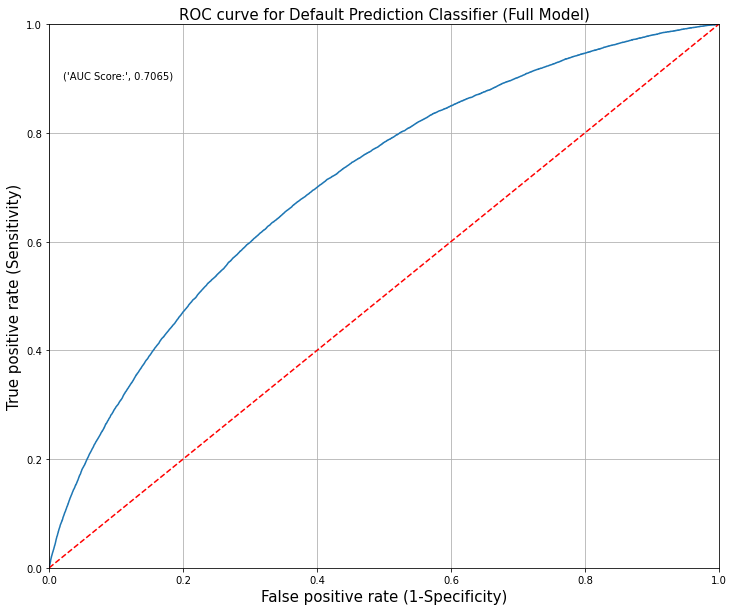

In [15]:
fpr, tpr, thresholds = roc_curve(y_test_full, y_test_full_prob)
# plot the ROC curve
plt.plot(fpr, tpr)
# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Default Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test_full, y_test_full_prob),4)))
plt.grid(True)

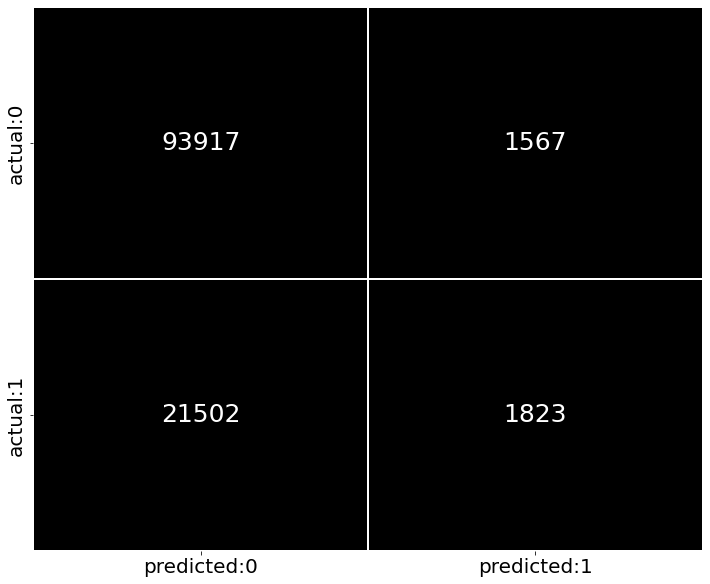

In [16]:
#calculating confusion matrix
cm=confusion_matrix(y_test_full,y_pred_full)
conf_matrix=pd.DataFrame(data=cm,columns=['predicted:0','predicted:1'],index=['actual:0','actual:1'])
#plotting confusion matrix
sns.heatmap(conf_matrix,annot=True,fmt='d',cbar=False,linewidths=0.1,cmap=ListedColormap(['Black']),annot_kws={'size':25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [17]:
#creating a dataframe to showcase various parameters of the model
score_card = pd.DataFrame(columns=['Model_name', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score','AIC'])


In [18]:
score_card=score_card.append({'Model_name':'logistic regression base model','AUC Score' : metrics.roc_auc_score(y_test_full, y_test_full_prob),
                                    'Precision Score': metrics.precision_score(y_test_full, y_pred_full),
                                    'Recall Score': metrics.recall_score(y_test_full, y_pred_full),
                                    'Accuracy Score': metrics.accuracy_score(y_test_full, y_pred_full),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test_full, y_pred_full),
                                    'f1-score': metrics.f1_score(y_test_full, y_pred_full),
                                    'AIC':logistic_reg_full_model.aic},ignore_index=True)

# Transformation

In [19]:
pt=PowerTransformer()
x=['loan_amnt','int_rate','installment','annual_inc','dti','revol_bal','revol_util','total_acc','mort_acc']
x_train_full[x]=pt.fit_transform(x_train_full[x])

In [20]:
x=['loan_amnt','int_rate','installment','annual_inc','dti','revol_bal','revol_util','total_acc','mort_acc']
x_test_full[x]=pt.fit_transform(x_test_full[x])

# using smote for oversampling

In [21]:
from imblearn.over_sampling import SMOTE
Sm=SMOTE(sampling_strategy=0.60)
X_train,y_train=Sm.fit_resample(x_train_full,y_train_full)

In [22]:
#fitting model after oversampling
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=1)
Logreg_full_model_samp=logreg.fit(X_train,y_train)
#prediction
y_pred_full_samp=Logreg_full_model_samp.predict(x_test_full)
#prediction probability
y_pred_full_samp_prob=Logreg_full_model_samp.predict_proba(x_test_full)
print(classification_report(y_test_full,y_pred_full_samp))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85     95484
           1       0.37      0.35      0.36     23325

    accuracy                           0.75    118809
   macro avg       0.60      0.60      0.60    118809
weighted avg       0.75      0.75      0.75    118809



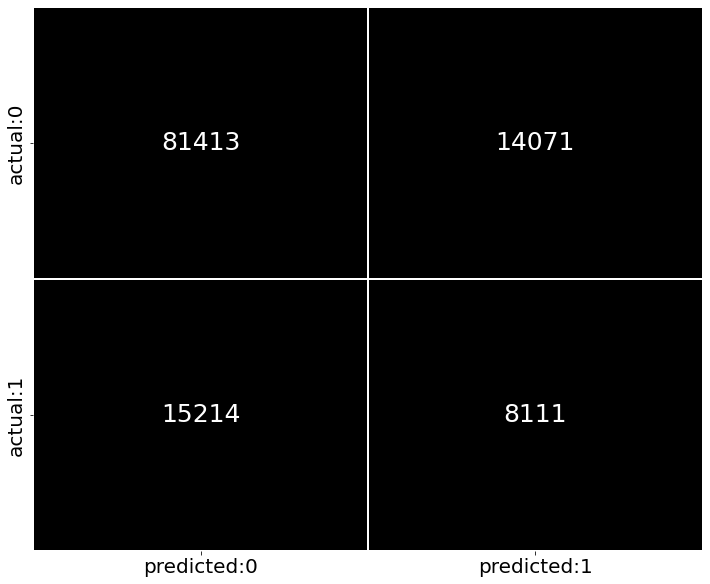

In [23]:
#calculating confusion matrix
cm=confusion_matrix(y_test_full,y_pred_full_samp)
conf_matrix=pd.DataFrame(data=cm,columns=['predicted:0','predicted:1'],index=['actual:0','actual:1'])
#plotting confusion matrix
sns.heatmap(conf_matrix,annot=True,fmt='d',cbar=False,linewidths=0.1,cmap=ListedColormap(['Black']),annot_kws={'size':25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

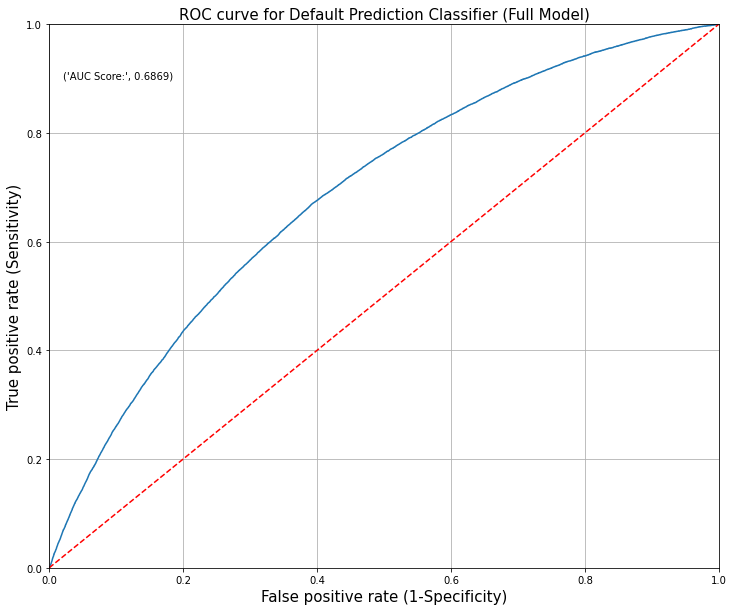

In [24]:
fpr, tpr, thresholds = roc_curve(y_test_full, y_pred_full_samp_prob[:,1])
# plot the ROC curve
plt.plot(fpr, tpr)
# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Default Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test_full, y_pred_full_samp_prob[:,1]),4)))
plt.grid(True)

In [25]:
score_card=score_card.append({'Model_name':'Logreg_full_model_samp','AUC Score' : metrics.roc_auc_score(y_test_full,y_pred_full_samp_prob[:,1]),
                                    'Precision Score': metrics.precision_score(y_test_full, y_pred_full_samp),
                                    'Recall Score': metrics.recall_score(y_test_full, y_pred_full_samp),
                                    'Accuracy Score': metrics.accuracy_score(y_test_full, y_pred_full_samp),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test_full, y_pred_full_samp),
                                    'f1-score': metrics.f1_score(y_test_full, y_pred_full_samp),
                                      },ignore_index=True)

In [26]:
#oversampling using minority sampling_strategy
from imblearn.over_sampling import SMOTE
Sm=SMOTE(sampling_strategy='minority')
X_trainm,y_trainm=Sm.fit_resample(x_train_full,y_train_full)

In [27]:
#fitting model after oversampling
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=1)
Logreg_full_model_samp_minority=logreg.fit(X_trainm,y_trainm)
#prediction
y_pred_full_samp=Logreg_full_model_samp_minority.predict(x_test_full)
#prediction probability
y_pred_full_samp_prob=Logreg_full_model_samp_minority.predict_proba(x_test_full)
print(classification_report(y_test_full,y_pred_full_samp))

              precision    recall  f1-score   support

           0       0.87      0.67      0.76     95484
           1       0.30      0.59      0.40     23325

    accuracy                           0.65    118809
   macro avg       0.59      0.63      0.58    118809
weighted avg       0.76      0.65      0.69    118809



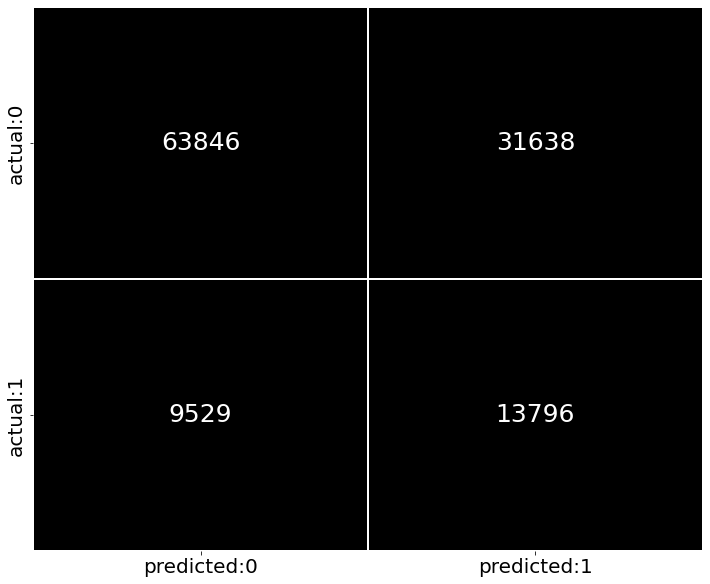

In [28]:
#calculating confusion matrix
cm=confusion_matrix(y_test_full,y_pred_full_samp)
conf_matrix=pd.DataFrame(data=cm,columns=['predicted:0','predicted:1'],index=['actual:0','actual:1'])
#plotting confusion matrix
sns.heatmap(conf_matrix,annot=True,fmt='d',cbar=False,linewidths=0.1,cmap=ListedColormap(['Black']),annot_kws={'size':25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

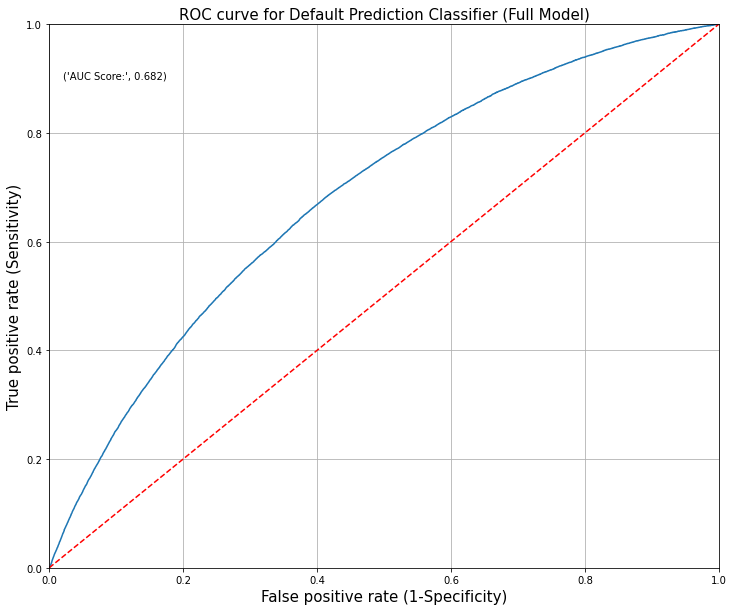

In [29]:
fpr, tpr, thresholds = roc_curve(y_test_full, y_pred_full_samp_prob[:,1])
# plot the ROC curve
plt.plot(fpr, tpr)
# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Default Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test_full, y_pred_full_samp_prob[:,1]),4)))
plt.grid(True)

In [30]:
score_card=score_card.append({'Model_name':'Logreg_full_model_samp_minority','AUC Score' : metrics.roc_auc_score(y_test_full,y_pred_full_samp_prob[:,1]),
                                    'Precision Score': metrics.precision_score(y_test_full, y_pred_full_samp),
                                    'Recall Score': metrics.recall_score(y_test_full, y_pred_full_samp),
                                    'Accuracy Score': metrics.accuracy_score(y_test_full, y_pred_full_samp),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test_full, y_pred_full_samp),
                                    'f1-score': metrics.f1_score(y_test_full, y_pred_full_samp),
                                      },ignore_index=True)

In [31]:
score_card

,Model_name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,AIC
0,logistic regression base model,0.706537,0.537758,0.078156,0.805831,0.091197,0.136478,250724.623119
1,Logreg_full_model_samp,0.686884,0.365657,0.347738,0.753512,0.204154,0.356473,NaN
2,Logreg_full_model_samp_minority,0.681976,0.303649,0.591468,0.653503,0.191527,0.401286,NaN


# fit the model using RFE feature selection

In [32]:
# initiate logistic regression model to use in feature selection
logreg = LogisticRegression()
rfe_model = RFE(estimator = logreg, n_features_to_select =10 )
rfe_model = rfe_model.fit(X_train, y_train)
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'annual_inc',
       'purpose', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_JOINT'],
      dtype='object')


In [33]:
X_train=X_train[['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'annual_inc',
       'purpose', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_JOINT']]

In [34]:
X_test_full=x_test_full[['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'annual_inc',
       'purpose', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_JOINT']]

In [35]:
#fitting model on best 10 features
logreg=LogisticRegression(random_state=12)
Logreg_full_model_rfe=logreg.fit(X_train,y_train)
#prediction
y_pred_full_rfe=Logreg_full_model_rfe.predict(X_test_full)
#prediction probability
y_pred_full_rfe_prob=Logreg_full_model_rfe.predict_proba(X_test_full)
print(classification_report(y_test_full,y_pred_full_rfe))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85     95484
           1       0.35      0.32      0.33     23325

    accuracy                           0.75    118809
   macro avg       0.59      0.59      0.59    118809
weighted avg       0.74      0.75      0.74    118809



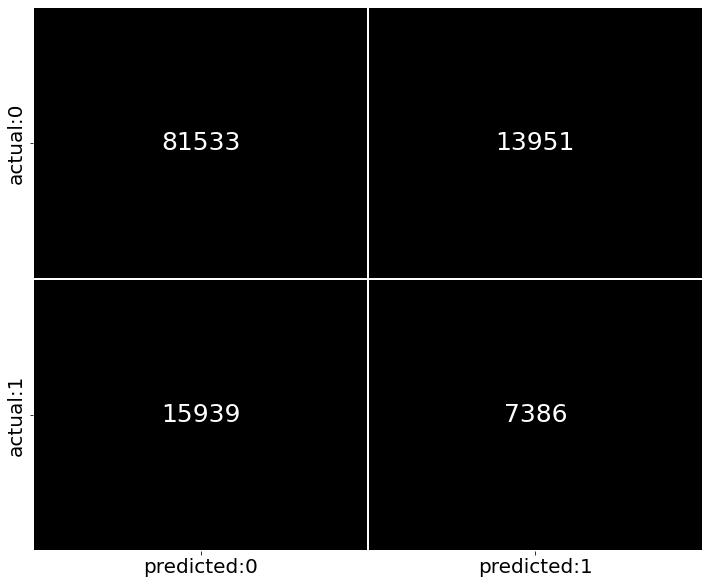

In [36]:
#calculating confusion matrix
cm=confusion_matrix(y_test_full,y_pred_full_rfe)
conf_matrix=pd.DataFrame(data=cm,columns=['predicted:0','predicted:1'],index=['actual:0','actual:1'])
#plotting confusion matrix
sns.heatmap(conf_matrix,annot=True,fmt='d',cbar=False,linewidths=0.1,cmap=ListedColormap(['Black']),annot_kws={'size':25})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [37]:
score_card=score_card.append({'Model_name':'Logreg_full_model_rfe','AUC Score' : metrics.roc_auc_score(y_test_full,y_pred_full_rfe_prob[:,1]),
                                    'Precision Score': metrics.precision_score(y_test_full, y_pred_full_rfe),
                                    'Recall Score': metrics.recall_score(y_test_full, y_pred_full_rfe),
                                    'Accuracy Score': metrics.accuracy_score(y_test_full, y_pred_full_rfe),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test_full, y_pred_full_rfe),
                                    'f1-score': metrics.f1_score(y_test_full, y_pred_full_rfe),
                                      },ignore_index=True)

In [38]:
score_card

,Model_name,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,AIC
0,logistic regression base model,0.706537,0.537758,0.078156,0.805831,0.091197,0.136478,250724.623119
1,Logreg_full_model_samp,0.686884,0.365657,0.347738,0.753512,0.204154,0.356473,NaN
2,Logreg_full_model_samp_minority,0.681976,0.303649,0.591468,0.653503,0.191527,0.401286,NaN
3,Logreg_full_model_rfe,0.669834,0.346159,0.316656,0.748420,0.176223,0.330751,NaN


In [39]:
# initiate logistic regression model to use in feature selection
logreg = LogisticRegression()
rfe_model = RFE(estimator = logreg,n_features_to_select=12)
rfe_model = rfe_model.fit(X_trainm, y_trainm)
feat_index = pd.Series(data = rfe_model.ranking_, index = X_trainm.columns)
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'annual_inc',
       'purpose', 'dti', 'pub_rec_bankruptcies',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_JOINT'],
      dtype='object')


In [40]:
X_trainm=X_trainm[['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'annual_inc',
       'purpose', 'dti', 'pub_rec_bankruptcies',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_JOINT']]

In [41]:
X_test_full=x_test_full[['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'annual_inc',
       'purpose', 'dti', 'pub_rec_bankruptcies',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_JOINT']]

In [42]:
#fitting model on best 10 features
logreg=LogisticRegression(random_state=1)
Logreg_full_model_rfe=logreg.fit(X_trainm,y_trainm)
#prediction
y_pred_full_rfe=Logreg_full_model_rfe.predict(X_test_full)
#prediction probability
y_pred_full_rfe_prob=Logreg_full_model_rfe.predict_proba(X_test_full)
print(classification_report(y_test_full,y_pred_full_rfe))

              precision    recall  f1-score   support

           0       0.87      0.67      0.76     95484
           1       0.30      0.58      0.40     23325

    accuracy                           0.65    118809
   macro avg       0.58      0.62      0.58    118809
weighted avg       0.76      0.65      0.69    118809



In [43]:
score_card=score_card.append({'Model_name':'Logreg_full_model_rfe_minority','AUC Score' : metrics.roc_auc_score(y_test_full,y_pred_full_rfe_prob[:,1]),
                                    'Precision Score': metrics.precision_score(y_test_full, y_pred_full_rfe),
                                    'Recall Score': metrics.recall_score(y_test_full, y_pred_full_rfe),
                                    'Accuracy Score': metrics.accuracy_score(y_test_full, y_pred_full_rfe),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test_full, y_pred_full_rfe),
                                    'f1-score': metrics.f1_score(y_test_full, y_pred_full_rfe),
                                      },ignore_index=True)

# Ridge classifier

In [44]:
ridge=RidgeClassifier()
ridge.fit(X_trainm,y_trainm)
y_pred_ridge=ridge.predict(x_test_full)
print(classification_report(y_test_full,y_pred_ridge))

ValueError: X has 21 features, but RidgeClassifier is expecting 12 features as input.

In [ ]:
score_card=score_card.append({'Model_name':'ridge classifier','AUC Score' : metrics.roc_auc_score(y_test_full,y_pred_ridge),
                                    'Precision Score': metrics.precision_score(y_test_full, y_pred_ridge),
                                    'Recall Score': metrics.recall_score(y_test_full, y_pred_ridge),
                                    'Accuracy Score': metrics.accuracy_score(y_test_full, y_pred_ridge),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test_full, y_pred_ridge),
                                    'f1-score': metrics.f1_score(y_test_full, y_pred_ridge),
                                      },ignore_index=True)

# SGDClassifier

In [ ]:
sgd=SGDClassifier()
sgd.fit(X_trainm,y_trainm)
y_pred_sgd=sgd.predict(x_test_full)
print(classification_report(y_test_full,y_pred_sgd))

In [ ]:
score_card=score_card.append({'Model_name':'sgd classifier','AUC Score' : metrics.roc_auc_score(y_test_full,y_pred_sgd),
                                    'Precision Score': metrics.precision_score(y_test_full, y_pred_sgd),
                                    'Recall Score': metrics.recall_score(y_test_full, y_pred_sgd),
                                    'Accuracy Score': metrics.accuracy_score(y_test_full, y_pred_sgd),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test_full, y_pred_sgd),
                                    'f1-score': metrics.f1_score(y_test_full, y_pred_sgd),
                                      },ignore_index=True)

**INTERPRETATION:** if we compare all these three model then the `Logreg_full_model_rfe` can be considered as a good model
because all the model parameters like `accuracy`,`Kappa score`,'`f1-score` is high for this model and also  `precision`,and,`recall`are balanced for this model.
but overall model is not doing great in predicting defaulters.

In [ ]:
score_card